In [49]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
r = requests.get('https://api.alternative.me/fng/?limit=0')

In [12]:
df = pd.DataFrame(r.json()["data"])
df.value = df.value.astype(int)
df

,value,value_classification,timestamp,time_until_update
0,11,Extreme Fear,1652054400,22370
1,18,Extreme Fear,1651968000,NaN
2,23,Extreme Fear,1651881600,NaN
3,22,Extreme Fear,1651795200,NaN
4,27,Fear,1651708800,NaN
...,...,...,...,...
1551,11,Extreme Fear,1517788800,NaN
1552,24,Extreme Fear,1517702400,NaN
1553,40,Fear,1517616000,NaN
1554,15,Extreme Fear,1517529600,NaN


In [13]:
df.timestamp = pd.to_datetime(df.timestamp, unit='s')
df


In [15]:
df.set_index('timestamp', inplace=True)

In [19]:
df = df[::-1]

In [21]:
df

,value,value_classification,time_until_update
timestamp,,,
2018-02-01,30,Fear,NaN
2018-02-02,15,Extreme Fear,NaN
2018-02-03,40,Fear,NaN
2018-02-04,24,Extreme Fear,NaN
2018-02-05,11,Extreme Fear,NaN
...,...,...,...
2022-05-05,27,Fear,NaN
2022-05-06,22,Extreme Fear,NaN
2022-05-07,23,Extreme Fear,NaN


<AxesSubplot:xlabel='timestamp'>

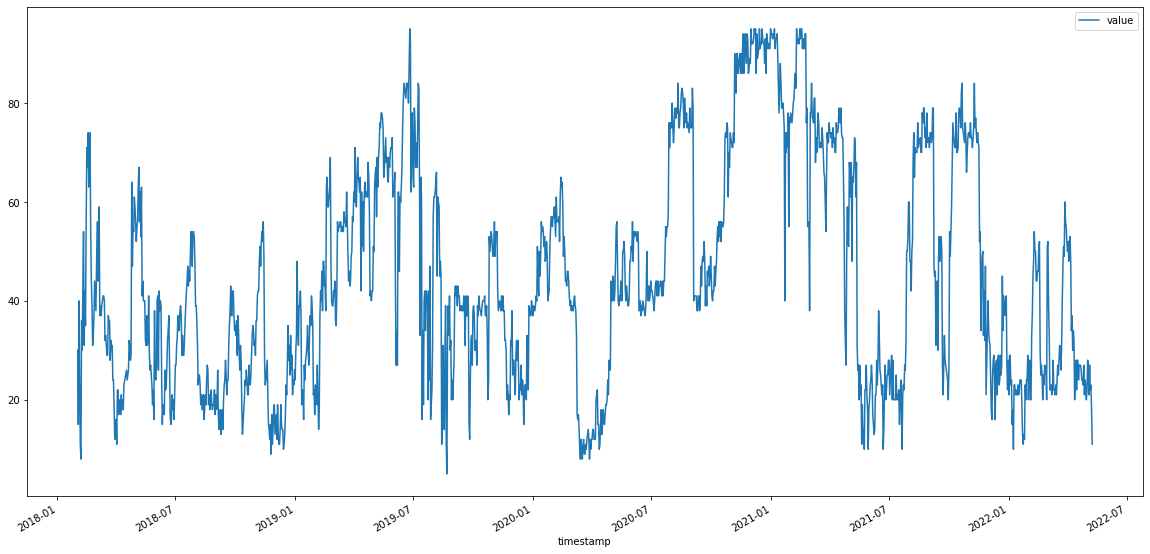

In [22]:
df.plot(figsize= (20,10))


In [24]:
btc_raw_df = pd.read_parquet("/home/giujorge/Documents/Projets/bot_strategies/data/raw/BTC-USDT.csv.parquet.gzip")
btc_raw_df

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
timestamp,,,,,,,,,,,
2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.77518300,1502942459999,7564.90685084,3,0.07518300,320.39085084,7960.54017996
2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.00000000,1502942519999,0.00000000,0,0.00000000,0.00000000,7960.45262989
2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.26107400,1502942579999,1117.54292144,2,0.26107400,1117.54292144,7960.37529526
2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.01200800,1502942639999,51.17185184,3,0.01200800,51.17185184,7960.37529526
2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.14079600,1502942699999,599.99933808,1,0.14079600,599.99933808,7960.37529526
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-18 14:09:00,39423.05,39423.06,39377.05,39385.62,22.37338000,1650290999999,881512.83100580,758,6.59638000,259885.09290650,0
2022-04-18 14:10:00,39385.61,39401.54,39370.24,39400.00,29.43069000,1650291059999,1159033.25545720,788,14.55146000,573044.31840130,0
2022-04-18 14:11:00,39400.00,39444.80,39399.83,39442.55,25.65637000,1650291119999,1011437.53518520,720,13.72377000,541044.94403500,0


In [28]:
df1 = btc_raw_df.resample('1D').agg({'close' : 'last'})
df1

In [30]:
tog = df.merge(df1, on = 'timestamp')
tog

In [34]:
df1.loc['2018-02-01']

close    9224.52
Name: 2018-02-01 00:00:00, dtype: float64

In [35]:
tog['change'] = tog.close.pct_change()
tog

,value,value_classification,time_until_update,close,change
timestamp,,,,,
2018-02-01,30,Fear,NaN,9224.52,NaN
2018-02-02,15,Extreme Fear,NaN,8873.03,-0.038104
2018-02-03,40,Fear,NaN,9199.96,0.036845
2018-02-04,24,Extreme Fear,NaN,8184.81,-0.110343
2018-02-05,11,Extreme Fear,NaN,6939.99,-0.152089
...,...,...,...,...,...
2022-04-14,28,Fear,NaN,39942.38,-0.029295
2022-04-15,22,Extreme Fear,NaN,40551.90,0.015260
2022-04-16,28,Fear,NaN,40378.71,-0.004271


In [ ]:
# Strategy

In [36]:
tog["position"] = np.where(tog.value > 50, 1, 0)

In [38]:
strategy = tog.position * tog.change

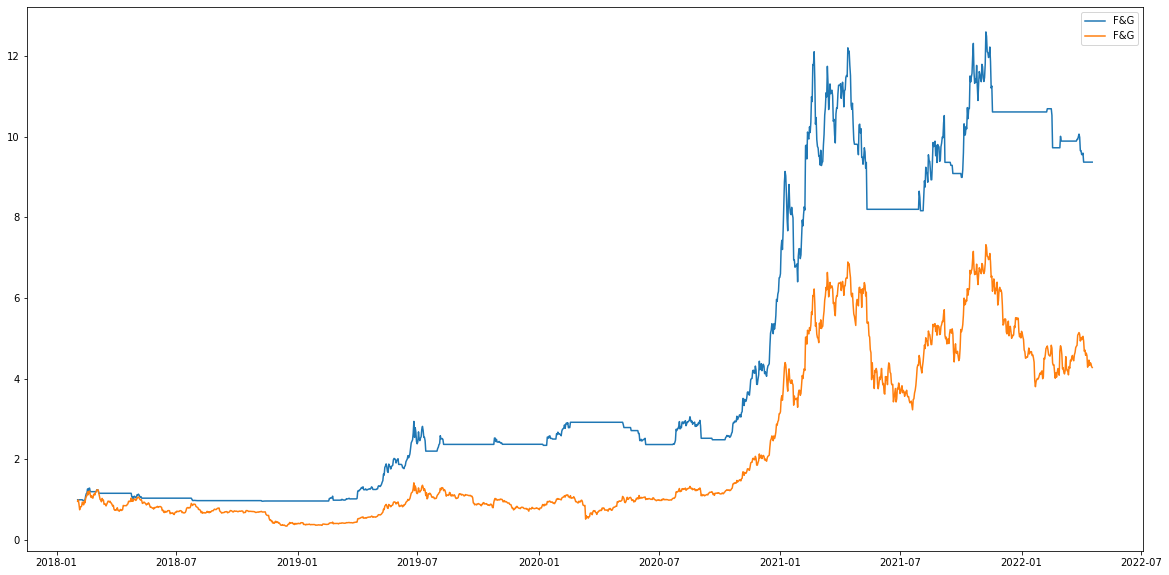

In [52]:
plt.figure(figsize=(20,10))
plt.plot((strategy +1).cumprod(), label='F&G')
plt.plot((tog.change +1).cumprod(), label='F&G')
plt.legend()

<AxesSubplot:xlabel='timestamp'>

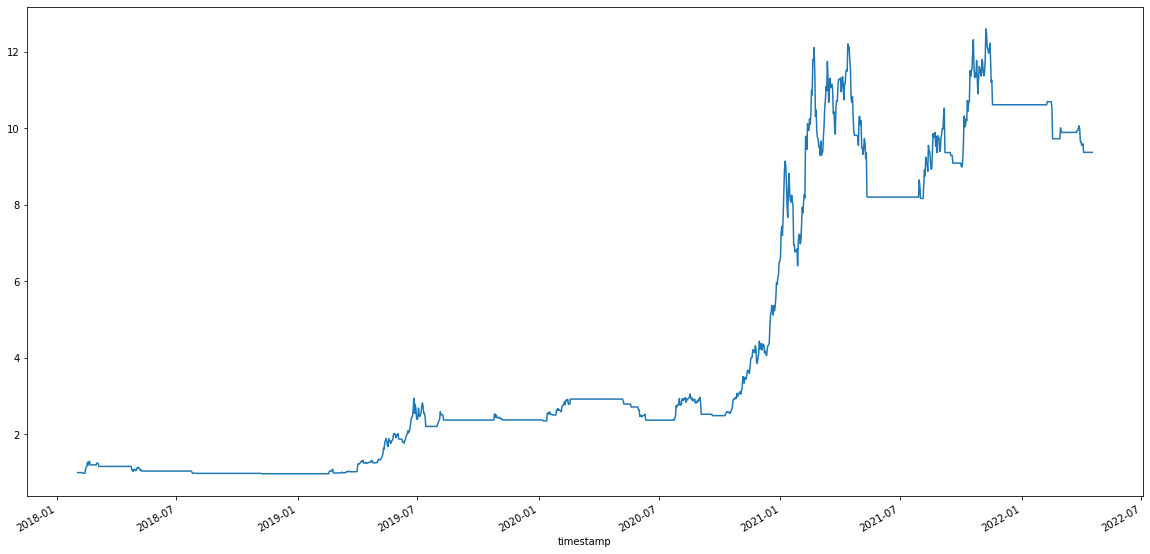

In [41]:
.plot(figsize=(20,10))